# Diffusion coefficient fitting

This is an example notebook for the automatic fitting of diffusion coefficients from trajectory data. 

Please read (and cite) the following paper, which explains the procedure used in this notebook in detail: 
J. Bullerjahn, S. v. Bülow, G. Hummer: Optimal estimates of diffusion coefficients from molecular dynamics simulations, Journal of Chemical Physics XXX, YYYYY (2020).

# Input of 3D trajectory

We import the module and provide the inputs. Per default, only the input trajectory `fz` is required. Our example trajectory is extracted from an MD simulation of a single ubiquitin protein in TIP4P-D water. The data points are the time series [in ps] of the protein center-of-mass [in nm].

This trajectory needs to be correctly "unwrapped" (i.e. PBC removed): S. v. Bülow, J. Bullerjahn, G. Hummer, Systematic errors in diffusion coefficients from long-time molecular dynamics simulations at constant pressure, Journal of Chemical Physics XXX, YYYYY (2020).

In [1]:
from Dfit import *

# required
fz = 'example_trajectory_3D.dat' # length unit: nm, time unit: ps

# optional
tmin = 1 # Minimum timestep used for MSD calculation
tmax = 100 # Maximum timestep used for MSD calculation
m = 20 # Number of MSD values in fitting
nseg = 50 # Number of segments
dt = 1.0 # dt*tunit is the timestep of the input trajectory

(For more options, refer to the README or the description in the header of the module.)

From the input format in `fz` (three columns, 500000 rows), the code recognizes the input as a 3D timeseries with 500000 data points each. 1D, 2D and 3D data can be used as input.

# Execute fitting routine

The fitting of our example trajectory should not take longer than about a minute on most computers.

In [2]:
res_3D = Dfit.Dcov(fz=fz,tmin=tmin,tmax=tmax,m=m,nseg=nseg,dt=dt)
res_3D.run_Dfit()

100% (100 of 100) |######################| Elapsed Time: 0:00:17 Time:  0:00:17


# Analysis

We have to provide additional input for the analysis and finite-size correction:

Finite-size corrected diffusion coefficient D_t for timestep 7.0 ps: 0.0001523 nm^2/ps with standard dev. 2.309e-06 nm^2/ps


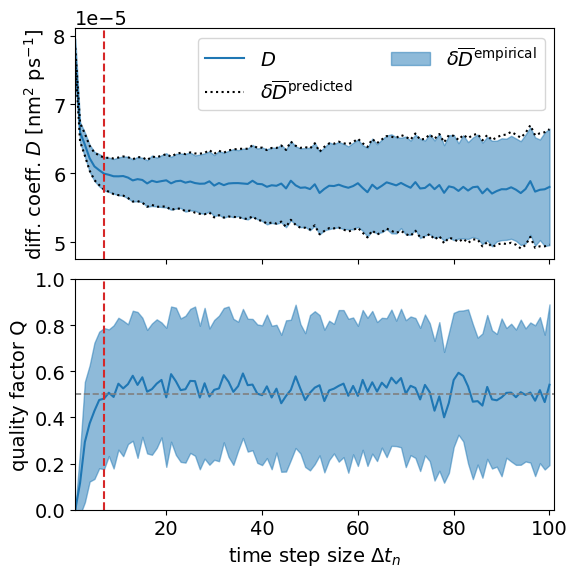

In [4]:
# For analysis:
tc = 7 # tc is connected to the timestep [in ps] by tc*dt. If tmin=1 and dt=1, then tc=7 corresponds to a 7ps timestep.

# If desired, for finite-size correction (Yeh, Hummer, JPCB 2004):
eta = 9.0e-4 # Viscosity in Pa*s
L = 7.5 # Box edge length in nm (cubic box!)
T = 300 # Temperature in Kelvin

res_3D.analysis(tc=tc)
res_3D.finite_size_correction(T=T,eta=eta,L=L,tc=tc)

We are provided with
* D_analysis.pdf (change name with option `fout`, change format with option `imgfmt`) --> plots, also shown in this notebook 
* D_analysis.dat (change name with option `fout`) --> Results file. Provides values for the Diffusion coefficient and its variance. Also gives results per input dimension (x,y,z).

For very small timesteps, the diffusion coefficient strongly depends on $\Delta{t}_n$ (upper plot) and the quality factor Q is far below the optimal value of 0.5 (lower plot). For $\Delta{t}_n$ = 6 (corresponding to a 6 ps time step in our example trajectory), Q reaches 0.5 and the estimated diffusion coefficient stabilizes. Therefore, the diffusion coefficient (and its corresponding variance) for this time step should be chosen. Repeat analysis() until you find a reasonable `tc`.

(Note that the values here differ slightly from the values in the reference paper, because we use a truncated trajectory to speed up the calculation here).

The default values of the optional parameters may not give optimal results for all trajectories. If the quality factor Q never reaches ~0.5, consider increasing `tmax` or `m`. If this does not help, your particle may show significant non-diffusive behavior. If `Q` fluctuates wildly, consider increasing the number of segments. 

# One-dimensional trajectory

You can also find the file `example_trajectory_1D.dat` in the example folder. This corresponds to only the x-coordinates of our example trajectory. We now show that 1D data can likewise be processed by the fitting procedure:

100% (100 of 100) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


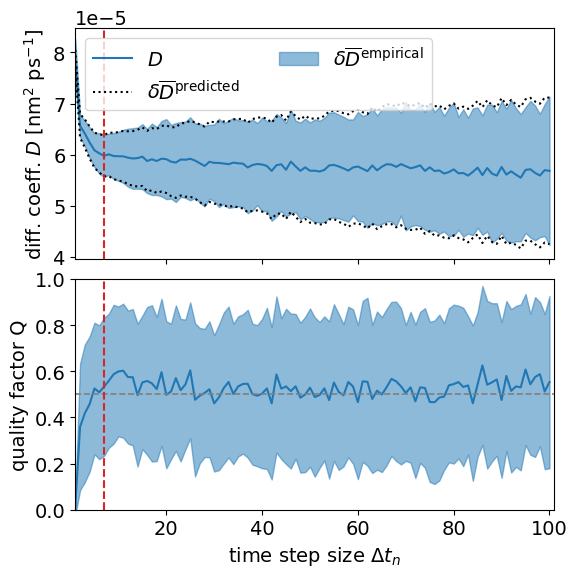

In [6]:
fz = 'example_trajectory_1D.dat'

res_1D = Dfit.Dcov(fz=fz,tmin=tmin,tmax=tmax,m=m,nseg=nseg,dt=dt)
res_1D.run_Dfit()
res_1D.analysis(tc=tc)

Note that the diffusion coefficient shows a larger variance and the quality factor fluctuates more strongly for our 1D data.